Part 2: Business Questions - Data Analysis Task

A. Hotel Performance Insights
1. Find the top 5 hotels with the highest average Score.

2. Using only reviews from users in Europe (User continent = "Europe"), find the top 10
hotels with the highest average Score.

3. Among hotels that have all these amenities: Tennis court = YES, Gym = YES, Spa =
YES, and Casino = YES, find the bottom 5 hotels by average Score.

4. Find the 10 hotels with the largest number of review entries in the dataset. For each of
these hotels, identify the top 3 User country values contributing the most reviews.

5. a) Count the number of reviews from each User continent. Which continent has the most
reviews?
b) For each continent, compute the average Score and the average Helpful votes. Then
report the top 3 continents by average Score and the top 3 by average Helpful votes.

6. a) For each User country, count how many reviews are for hotels with Free internet =
NO. Report the top 3 countries.
b) Among reviews where Free internet = NO, find the top 3 hotels by average Helpful
votes.

7. Find the top 5 hotels (by Nr. rooms) that satisfy all conditions:
Hotel stars >= 4, average Score >= 4, Free internet = YES, Gym = YES, and Pool =
YES, Report: hotel name, rooms, stars, average score, and review count.

8. a) Which 3 Review month have the most reviews?
b) Which 3 Review weekday have the most reviews?
c) Which Traveler type appears most frequently?
d) Which Period of stay appears most frequently?

In [23]:
#import necessary libraries to work with the data

import pandas as pd
import numpy as np
import matplotlib

# load the cleaned data set
df = pd.read_csv("LasVegasTripAdvisorReviews-Cleaned.csv")
df.head()


,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11.0,4.0,13.0,5.0,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773.0,North America,9.0,January,Thursday
1,USA,119.0,21.0,75.0,3.0,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773.0,North America,3.0,January,Friday
2,USA,36.0,9.0,25.0,5.0,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773.0,North America,2.0,February,Saturday
3,UK,14.0,7.0,14.0,4.0,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773.0,Europe,6.0,February,Friday
4,Canada,5.0,5.0,2.0,4.0,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773.0,North America,7.0,March,Tuesday


In [ ]:
# Question 1
# find top 5 hotels with the highest average score
top_5_hotels = df.groupby('Hotel name')['Score'].mean().nlargest(5)
print(top_5_hotels)

Hotel name
Wynn Las Vegas                  4.625000
Encore at wynn Las Vegas        4.590909
The Venetian Las Vegas Hotel    4.583333
Marriott's Grand Chateau        4.523810
Wyndham Grand Desert            4.434783
Name: Score, dtype: float64


In [5]:
# Question 2
# create a subset of the data for users from Europe
european_users = df[df['User continent'] == 'Europe']
# find top 10 hotels with highest average score from European users
top_10_european_hotels = european_users.groupby('Hotel name')['Score'].mean().nlargest(10)
print(top_10_european_hotels)

Hotel name
Wynn Las Vegas                                         5.000000
Encore at wynn Las Vegas                               4.666667
The Cromwell                                           4.666667
The Venetian Las Vegas Hotel                           4.625000
The Westin las Vegas Hotel Casino & Spa                4.500000
The Cosmopolitan Las Vegas                             4.444444
Bellagio Las Vegas                                     4.333333
Marriott's Grand Chateau                               4.333333
Tropicana Las Vegas - A Double Tree by Hilton Hotel    4.333333
Trump International Hotel Las Vegas                    4.250000
Name: Score, dtype: float64


In [ ]:
# Question 3
#filter dataset
filtered_hotels = df[(df['Tennis court'] == 'YES') & (df['Spa'] == 'YES') & (df['Casino'] == 'YES')]
#how many hotels meet this criteria
print(f"Number of hotels with tennis court, spa, and casino: {filtered_hotels['Hotel name'].nunique()}")
#find worst 5 hotels by average score
worst_5_hotels = filtered_hotels.groupby('Hotel name')['Score'].mean().nsmallest(5)
print(worst_5_hotels)

Number of hotels with tennis court, spa, and casino: 4
Hotel name
Treasure Island- TI Hotel & Casino                     3.904762
Tropicana Las Vegas - A Double Tree by Hilton Hotel    3.950000
Tuscany Las Vegas Suites & Casino                      4.217391
Wynn Las Vegas                                         4.625000
Name: Score, dtype: float64


In [10]:
# Question 4
#create dataset of most reviewed hotels
most_reviewed_hotels = df['Hotel name'].value_counts().nlargest(10)
print(most_reviewed_hotels)
# for each hotel, find top 3 use country values contributing the most reviews
top_countries_per_hotel = df[df['Hotel name'].isin(most_reviewed_hotels.index)].groupby(['Hotel name', 'User country']).size().groupby(level=0, group_keys=False).nlargest(3)
print(top_countries_per_hotel)

Hotel name
Wynn Las Vegas                            24
The Venetian Las Vegas Hotel              24
The Cromwell                              24
Trump International Hotel Las Vegas       24
The Palazzo Resort Hotel Casino           23
Wyndham Grand Desert                      23
Bellagio Las Vegas                        23
Tuscany Las Vegas Suites & Casino         23
Caesars Palace                            23
Circus Circus Hotel & Casino Las Vegas    22
Name: count, dtype: int64
Hotel name                              User country
Bellagio Las Vegas                      USA              8
                                        UK               5
                                        India            2
Caesars Palace                          USA             14
                                        UK               4
                                        Australia        2
Circus Circus Hotel & Casino Las Vegas  USA              8
                                        Canada 

In [15]:
# Question 5
#count number of review per continent
review_counts_by_continent = df['User continent'].value_counts()
print(review_counts_by_continent)
# North America has the highest number of reviews

#average score and average helpful votes by continent
avg_score_helpful_by_continent = df.groupby('User continent').agg({'Score': 'mean', 'Helpful votes': 'mean'})
print(avg_score_helpful_by_continent)

#top 3 continents by score and top 3 by vote
top_3_score_continents = avg_score_helpful_by_continent['Score'].nlargest(3)
top_3_helpful_continents = avg_score_helpful_by_continent['Helpful votes'].nlargest(3)

print("TOP3 Score", top_3_score_continents)
print("TOP3 Votes", top_3_helpful_continents)


User continent
North America    269
Europe           110
Oceania           38
Asia              34
South America      7
Africa             6
Name: count, dtype: int64
                   Score  Helpful votes
User continent                         
Africa          3.666667      31.166667
Asia            3.794118      33.617647
Europe          4.136364      29.400000
North America   4.178439      32.951673
Oceania         4.131579      26.526316
South America   4.428571      33.428571
TOP3 Score User continent
South America    4.428571
North America    4.178439
Europe           4.136364
Name: Score, dtype: float64
TOP3 Votes User continent
Asia             33.617647
South America    33.428571
North America    32.951673
Name: Helpful votes, dtype: float64


In [ ]:
# Question 6
#for each user country,count number of review for hotels with Free internet=='NO' and report the top 3
#create dataset filtered by Free internet=='NO'
filtered_no_internet = df[df['Free internet'] == 'NO']
#how many entries in filtered_no_internet
print(f"Number of reviews for hotels without free internet: {filtered_no_internet.shape[0]}")
#how many unique hotels without free internet
print(f"Number of unique hotels without free internet: {filtered_no_internet['Hotel name'].nunique()}")
# count number of reviews by user country and get top 3
top_3_countries_no_internet = filtered_no_internet['User country'].value_counts().nlargest(3)
print(top_3_countries_no_internet)
#there are overall not many hotels without free internet, shown by the small number of reviews

#in filtered_no_internet, find top 3 hotels by average helpful votes
top_3_hotels_no_internet = filtered_no_internet.groupby('Hotel name')['Helpful votes'].mean().nlargest(3)
print(top_3_hotels_no_internet)
#when looking for top 3 hotels, the only hotel without free internet is Monte Carlo Resort&Casino, so I can only report the Top 1

Number of reviews for hotels without free internet: 20
Number of unique hotels without free internet: 1
User country
USA       4
UK        3
Canada    2
Name: count, dtype: int64
Hotel name
Monte Carlo Resort&Casino    44.4
Name: Helpful votes, dtype: float64


In [ ]:
# Question 7
#create a subset of data with hotel stars >=4, average score >=4, free internet=="YES", gym== "YES", and Pool == "YES"
high_quality_hotels = df[(df['Hotel stars'] >= 4) & (df['Score'] >= 4) & (df['Free internet'] == 'YES') & (df['Gym'] == 'YES') & (df['Pool'] == 'YES')]
#number of unique hotels that meet this criteria
print(f"Number of high quality hotels: {high_quality_hotels['Hotel name'].nunique()}")
#find 5 hotels with greatest nr. rooms
top_5_room_hotels = high_quality_hotels.groupby('Hotel name')['Nr. rooms'].max().nlargest(5)
#the top 5 hotels with the most rooms are printed here:
print(top_5_room_hotels)
#The venetian las vegas hotel, bellagio las vegas, caesars palace, the palazzo resort hotel casino, and the cosmopolitan las vegas have the most rooms and fit the criteria
#report additional info for these hotels and count reviews for each
for hotel in top_5_room_hotels.index:
    hotel_info = high_quality_hotels[high_quality_hotels['Hotel name'] == hotel].iloc[0]
    print(f"Hotel Name: {hotel_info['Hotel name']}, Rooms: {hotel_info['Nr. rooms']}, Stars: {hotel_info['Hotel stars']}, Average Score: {hotel_info['Score']}, Review Count: {high_quality_hotels[high_quality_hotels['Hotel name'] == hotel].shape[0]}")




Number of high quality hotels: 12
Hotel name
The Venetian Las Vegas Hotel       4027.0
Bellagio Las Vegas                 3933.0
Caesars Palace                     3348.0
The Palazzo Resort Hotel Casino    3025.0
The Cosmopolitan Las Vegas         2959.0
Name: Nr. rooms, dtype: float64
Hotel Name: The Venetian Las Vegas Hotel, Rooms: 4027.0, Stars: 5.0, Average Score: 4.0, Review Count: 23
Hotel Name: Bellagio Las Vegas, Rooms: 3933.0, Stars: 5.0, Average Score: 4.0, Review Count: 19
Hotel Name: Caesars Palace, Rooms: 3348.0, Stars: 5.0, Average Score: 5.0, Review Count: 18
Hotel Name: The Palazzo Resort Hotel Casino, Rooms: 3025.0, Stars: 5.0, Average Score: 5.0, Review Count: 19
Hotel Name: The Cosmopolitan Las Vegas, Rooms: 2959.0, Stars: 5.0, Average Score: 4.0, Review Count: 18


In [ ]:
#Question 8
#which 3 Review month have the most reviews
top_3_review_months = df['Review month'].value_counts().nlargest(3)
print(top_3_review_months)
#february, march, and september each have the most reviews with 40

#which 3 review weekday havethe most reviews
top_3_review_weekdays = df['Review weekday'].value_counts().nlargest(3)
print(top_3_review_weekdays)
# first Wednesday, Tuesday, then Sunday have the most reviews

#which Period of stay appears most frequently
top_period_of_stay = df['Period of stay'].value_counts().nlargest(1)
print(top_period_of_stay)
# the most frequent period of stay is Sep-Nov with 118 stays

Review month
February     40
March        40
September    40
Name: count, dtype: int64
Review weekday
Wednesday    78
Tuesday      77
Sunday       71
Name: count, dtype: int64
Period of stay
Sep-Nov    118
Name: count, dtype: int64


B. Visual Data Storytelling

9. Create a histogram of the “Score” column.
10. Create a boxplot of “Score” by Traveler type.
11. Create a boxplot of Number of Rooms by Hotel stars

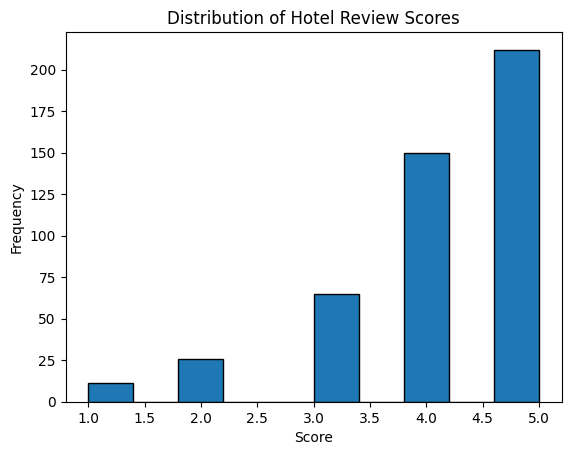

In [ ]:
#create a histogram of the "Score" column
import matplotlib.pyplot as plt
plt.hist(df['Score'], bins=10, edgecolor='black')
plt.title('Distribution of Hotel Review Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
fig1 = plt.gcf() #gets current figure
plt.show()
#save histogram to plots folder as png file
fig1.savefig('plots/histogram_score.png') #saves object

<Figure size 1000x600 with 0 Axes>

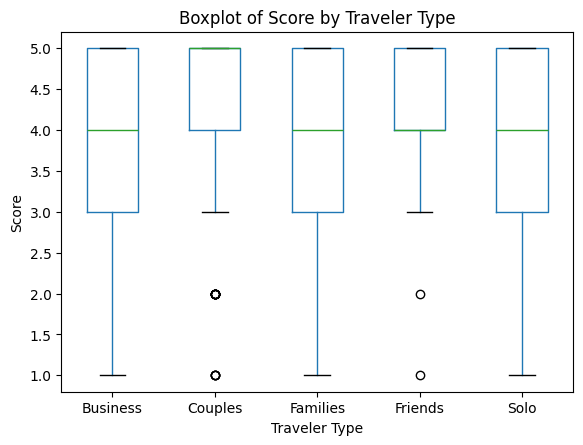

<Figure size 1000x600 with 0 Axes>

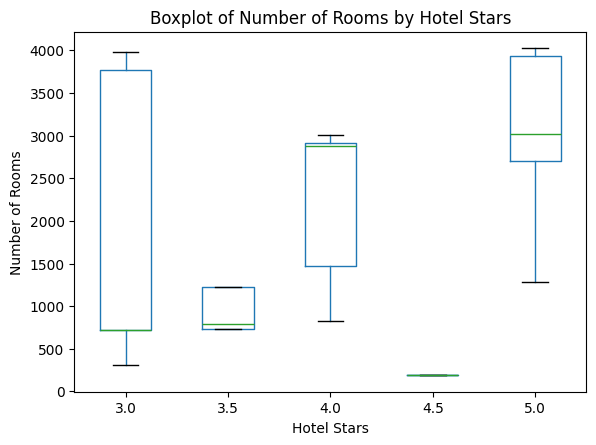

In [42]:
#create a boxplot of "Score" by Traveler type using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.boxplot(column='Score', by='Traveler type', grid=False)
plt.title('Boxplot of Score by Traveler Type')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('Traveler Type')
plt.ylabel('Score')
fig2 = plt.gcf() #gets current figure
plt.show()

#save boxplot to plots folder as png file
fig2.savefig('plots/boxplot_score_traveler_type.png')

#boxplot of number of rooms by hotel stars
plt.figure(figsize=(10, 6))
df.boxplot(column='Nr. rooms', by='Hotel stars', grid=False)
plt.title('Boxplot of Number of Rooms by Hotel Stars')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('Hotel Stars')
plt.ylabel('Number of Rooms')
fig3 = plt.gcf() #gets current figure
plt.show()

#save boxplot to plots folder as png file
fig3.savefig('plots/boxplot_nr_rooms_hotel_stars.png')